<h1 style="text-align: center;">Discrete Convolution</h1>
<p style="text-align: center;">Lab 3</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with convolution and its properties using Python.

### 2. Deliverables Overview 
##### Part 1
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**, **Task 3**, and **Task 4**.  
[ ] Code and plots for **Task 5**.

### 3. Part 1
##### 3.1 Purpose
Use the step and ramp functions developed in **Lab 2** to write functions to use in the rest of this lab.
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$f_1(t) = u(t - 2) - u(t - 9)$$  
$$f_2(t) = e^{-t}u(t)$$  
$$f_3(t) = r(t - 2)[u(t - 2) - u(t - 3)] + r(4 - t)[u(t - 3) - u(t - 4)]$$

In [3]:
# Include all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [7]:
# Insert code for functions f1, f2, and f3 here. Remember to include descriptions of each funtion including inputs and outputs

def step(t): # my step function
    """
    Signal u(t) creation
    Inputs: t - time vector
    Oututs: u - generated signal u(t)
    """ 
    u = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            u[i] = 0
        else:
            u[i] = 1
    return u

def ramp(t): # my ramp function
    """
    Signal r(t) creation
    Inputs: t - time vector
    Oututs: r - generated signal r(t)
    """ 
    r = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            r[i] = 0
        else:
            r[i] = t[i]
    return r

def func1(t): # function 1
    """
    Signal f1(t)=u(t-2)-step(t-9) creation
    Inputs: t - time vector
    Oututs: f - generated signal f1(t)
    """
    return step(t-2)-step(t-9)

def func2(t): # function 2
    """
    Signal f2(t)=exp(-t)*u(t) creation
    Inputs: t - time vector
    Oututs: f - generated signal f2(t)
    """
    return np.exp(-t)*step(t)

def func3(t): # function 3
    """
    Signal f3(t)=r(t-2)[u(t-2)-u(t-3)]+r(4-t)[u(t-3)-u(t-4)] creation
    Inputs: t - time vector
    Oututs: f - generated signal f3(t)
    """
    return ramp(t-2)*(step(t-2)-step(t-3))+ramp(4-t)*(step(t-3)-step(t-4))  
    

2. Plot the three functions in a single figure, seperate subplots, from $0 \le t \le 20$ s with time steps small enough to achieve appropriate resolution.

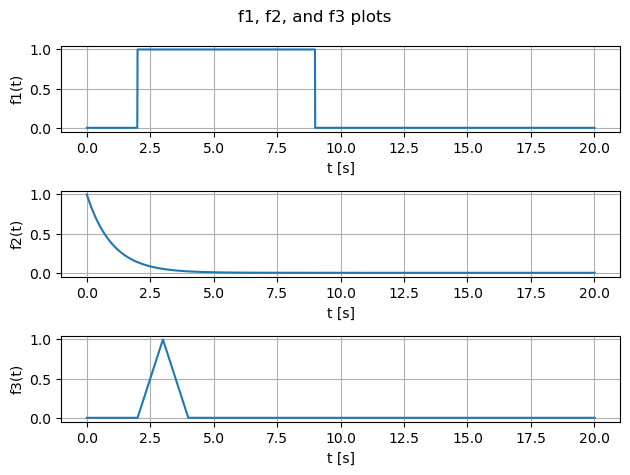

In [14]:
# Insert code to call each function and plot them all in one figure, three subplots, here

steps = 1e-2
t = np.arange(0, 20 + steps, steps)
y = func1(t)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.grid()
plt.ylabel("f1(t)")
plt.xlabel("t [s]")
plt.suptitle("f1, f2, and f3 plots")

t = np.arange(0, 20 + steps, steps)
y = func2(t)

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("f2(t)")
plt.xlabel("t [s]")

t = np.arange(0, 20 + steps, steps)
y = func3(t)

plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.grid()
plt.ylabel("f3(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Create code to perform the convolution of two functions. Verify this code with Python's built-in convolution tools.
##### 4.2 Tasks
1. Write your own code to perform convolution. Describe the functionality of your code thoroughly in the function description and using comments where appropriate. *Note: Recall that the duration of a convolution is the sum of the duration of each function convolved. Adjust your plot window sizes and time vectors appropriately. Hint: You will not have to use the numpy integrate function, think back to how you first learned integrals.

In [87]:
# Insert code for your convolution function here
def convolve(f1, f2, t):
    """
    Convolution Function
    Inputs: f1 - func1, f2 - func2, t - time vector
    Oututs: result - array of y vals from convolution
    """ 
    
    # initialize sigs using the passed functions
    sig1 = f1(t)
    sig2 = f2(t)

    # determine the length of the result and initialize result
    result_len = len(sig1) + len(sig2) - 1
    result = np.zeros(result_len)

    # execute convolution by iterating through each signal by multiplying each signal then adding to result
    for i in range(len(sig1)):
        for j in range(len(sig2)):
            result[i + j] += sig1[i] * sig2[j]

    result = result[:len(t)] # trim result to match duration

    return t, result # return

2. Plot the convolution of $f_1$ and $f_2$.

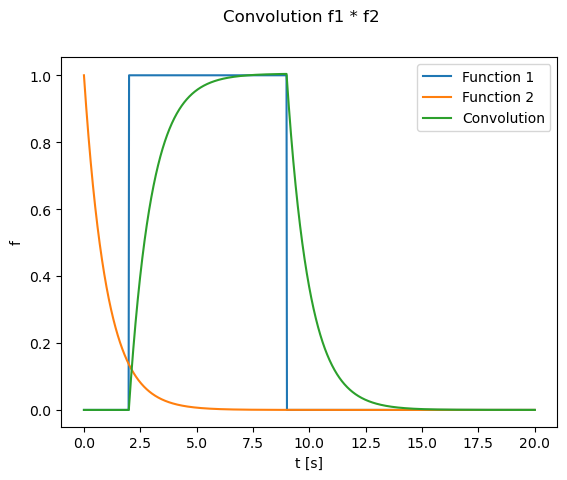

In [91]:
# Insert code to plot the appropriate convolution here

# initialize x values
x_vals = np.linspace(0, 20, 1000)

# Call the convolve function
steps = 1e-2
t = np.arange(0, 20 + steps, steps)
conv_x, conv_result = convolve(func1, func2, t)
conv_result *= steps

# Plot the original functions and the result
plt.plot(x_vals, func1(x_vals), label='Function 1')
plt.plot(x_vals, func2(x_vals), label='Function 2')
plt.plot(conv_x, conv_result, label='Convolution')
plt.ylabel("f")
plt.xlabel("t [s]")

plt.suptitle("Convolution f1 * f2")
plt.legend()
plt.show()

3. Plot the convolution of $f_2$ and $f_3$.

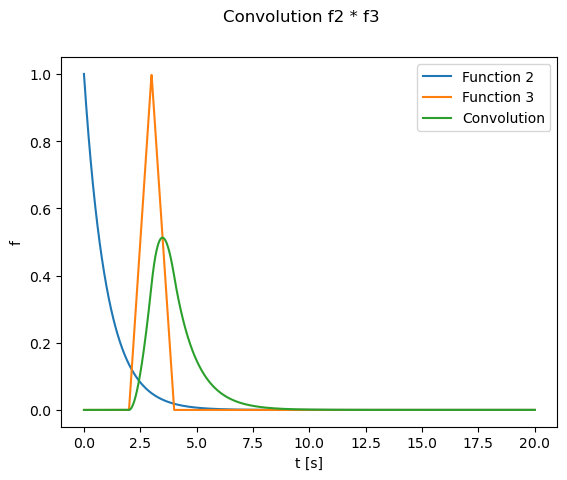

In [93]:
# Insert code to plot the appropriate convolution here

# initialize x values
x_vals = np.linspace(0, 20, 1000)

# Call the convolve function
steps = 1e-2
t = np.arange(0, 20 + steps, steps)
conv_x, conv_result = convolve(func2, func3, t)
conv_result *= steps

# Plot the original functions and the result
plt.plot(x_vals, func2(x_vals), label='Function 2')
plt.plot(x_vals, func3(x_vals), label='Function 3')
plt.plot(t, conv_result, label='Convolution')
plt.ylabel("f")
plt.xlabel("t [s]")

plt.suptitle("Convolution f2 * f3")
plt.legend()
plt.show()

4. Plot the convolution of $f_1$ and $f_3$.

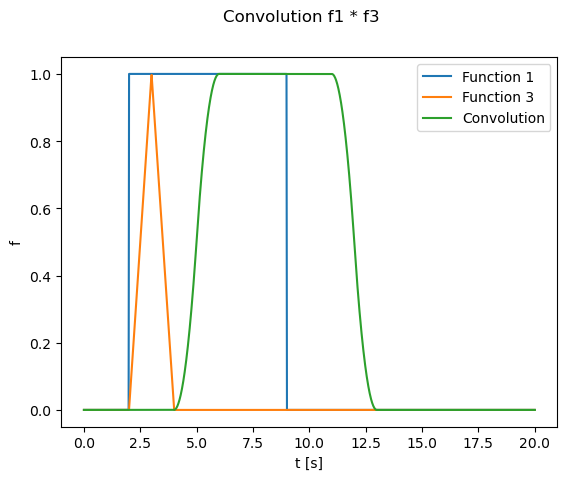

In [76]:
# Insert code to plot the appropriate convolution here

# initialize x values
x_vals = np.linspace(0, 20, 1000)

# call the convolve function
steps = 1e-2
t = np.arange(0, 20 + steps, steps)
conv_x, conv_result = convolve(func1, func3, t)
conv_result *= steps

# plot the original functions and the result
plt.plot(x_vals, func1(x_vals), label='Function 1')
plt.plot(x_vals, func3(x_vals), label='Function 3')
plt.plot(conv_x, conv_result, label='Convolution')
plt.ylabel("f")
plt.xlabel("t [s]")

plt.suptitle("Convolution f1 * f3")
plt.legend()
plt.show()

5. Verify your convolution function is working correctly using the **scipy.signal.convolve()** function by plotting the convolutions from **Task 2**, **Task 3**, and **Task 4** in one figure with three subplots.

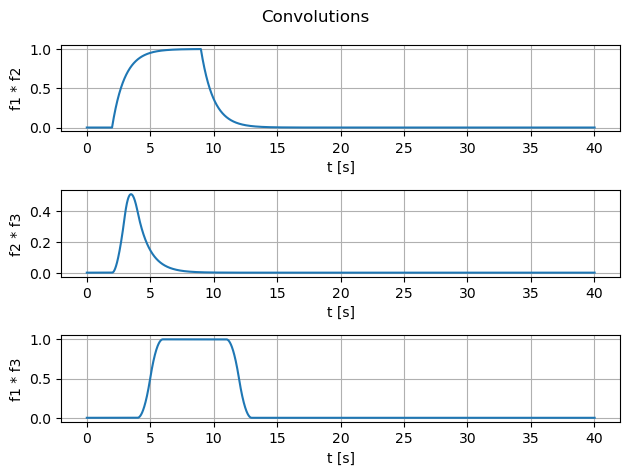

In [36]:
# Insert code using sig.convolve() to plot the convolutions from task 2, 3, and 4 in one figure with three subplots here.
steps = 1e-2
t = np.arange(0, 20 + steps, steps)
t_len = len(t)
t_ext = np.arange(0,2*t[t_len-1], steps)

f1 = func1(t)
f2 = func2(t)
f3 = func3(t)

conv_1_2 = sig.convolve(f1,f2)*steps

plt.figure()

plt.subplot(3, 1, 1)
plt.plot(t_ext, conv_1_2)
plt.grid()
plt.ylabel("f1 * f2")
plt.xlabel("t [s]")

conv_2_3 = sig.convolve(f2,f3)*steps

plt.subplot(3, 1, 2)
plt.plot(t_ext, conv_2_3)
plt.grid()
plt.ylabel("f2 * f3")
plt.xlabel("t [s]")

conv_1_3 = sig.convolve(f1,f3)*steps

plt.subplot(3, 1, 3)
plt.plot(t_ext, conv_1_3)
plt.grid()
plt.ylabel("f1 * f3")
plt.xlabel("t [s]")

plt.suptitle("Convolutions")
plt.tight_layout()
plt.show()

### 5. Questions
1. Did you work alone or with classmates on this lab? If you collaborated to get to the solution, what did that process look like?    
>I worked alone on this project.   
2. What was the most difficult part of this lab for you, and what did your problem-solving process look like? 
>The most difficult part was determining what the agorithm for doing a convolution was, once I was able to figure that part out I just had to integrate it into my program. To figure out the rest of the code I created a draft of the code, I then kept trying different things until I got it to work. 
3. Did you approach writing the code with analytical or graphical convolution in mind? Why did you chose this approach?
>I used both to figure it out. The graphical convolution is helpful for visualizing it but analytical convolution is helpful for syntax.
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>NA